# Example of using ioh-explainer

First we need to define the configuration space of an algorithm. We take a standard PSO algorithm as example.

In [3]:
from ConfigSpace import ConfigurationSpace
from ConfigSpace.util import generate_grid

cs = ConfigurationSpace({
    "F": (0.05, 2.0),              # Uniform float
    "CR" : (0.05, 2.0),                    # Uniform float
})

steps_dict = {
    "F": 20, 
    "CR" : 20,
}

In [4]:
from ioh_explainer.core import explainer
import pyswarms as ps
from modde import ModularDE, Parameters
import numpy as np

print(explainer)

def run_de(func, config, budget, dim, *args, **kwargs):
    item = {'F': np.array([float(config.get('F'))]), 'CR':np.array([float(config.get('CR'))]),  'lambda_' : 10*dim }
    c = ModularDE(func, **item)
    try:
        c.run()
        return []
    except Exception as e:
        print(f"Found target {func.state.current_best.y} target, but exception ({e}), so run failed")
        return []

de_explainer = explainer(run_de, 
                 cs , 
                 optimizer_args = None,
                 dims = [5],#, 10, 20, 40 
                 fids = [1], #,5
                 iids = 1, #20 
                 reps = 1, 
                 sampling_method = "grid",  #or random
                 grid_steps_dict = steps_dict,
                 sample_size = None,  #only used with random method
                 budget = 10000, #10000
                 seed = 1,
                 verbose = True)
de_explainer.run(paralell=True)

SyntaxError: invalid syntax (921446920.py, line 20)

0       100
1       100
2       100
3       100
4       100
       ... 
1995    100
1996    100
1997    100
1998    100
1999    100
Name: auc, Length: 2000, dtype: int64


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


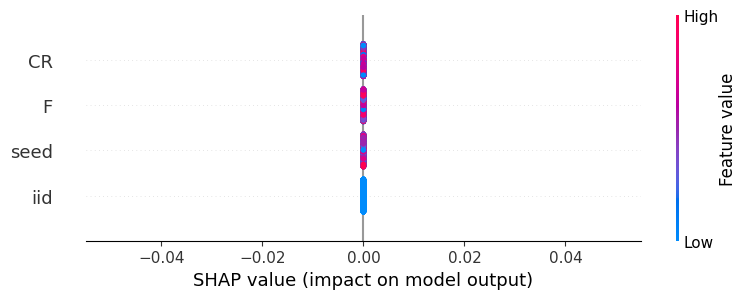

In [ ]:
import xgboost
import shap

df = de_explainer.df

#X = df1[:,1:-1]
subdf = df[(df['fid'] == 1) & (df['dim'] == 5)]
X = subdf[['iid', 'seed', 'F', 'CR']]
y = subdf['auc']
print(y)

# train xgboost model on diabetes data:
bst = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

# explain the model's prediction using SHAP values on the first 1000 training data samples
shap_values = shap.TreeExplainer(bst).shap_values(X)

shap.summary_plot(shap_values, X)

#for name in X.columns:
#    shap.dependence_plot(name, shap_values, X)